In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("C:/files/programming/Python/2025/jupyter/datasets/data_science_job.csv")

In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
# gender , major discipline , company size and company type  cant be evaluated using ccs since they are in high concentration

In [6]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [8]:
(len(df[cols].dropna())/len(df))*100

89.68577095730244

In [9]:
# 89 % of data will remain after removing this data

In [10]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

In [11]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [12]:
# analyzing both the data with histogram => if they are comparable then it's right to remove values , else not 

<Axes: >

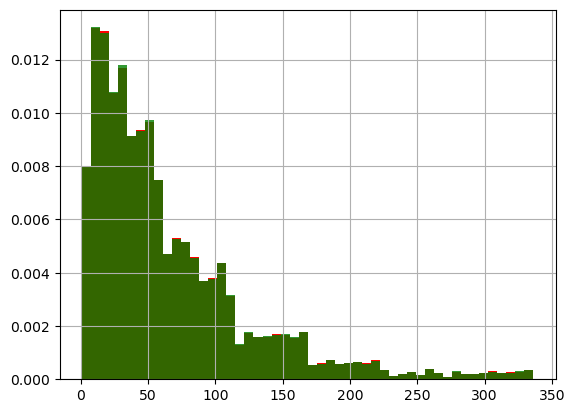

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

# data after cca
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.8)

<Axes: ylabel='Density'>

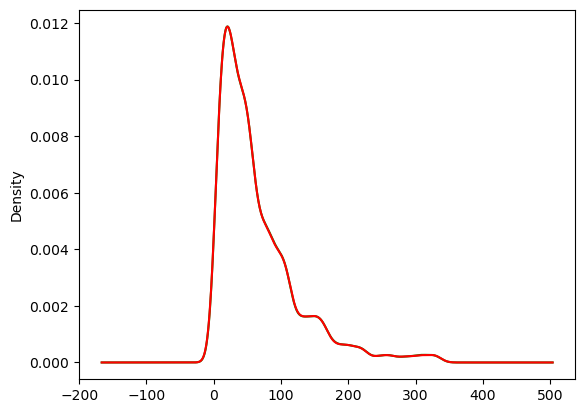

In [21]:
df['training_hours'].plot.density(color='green')
new_df['training_hours'].plot.density(color='red')

<Axes: ylabel='Density'>

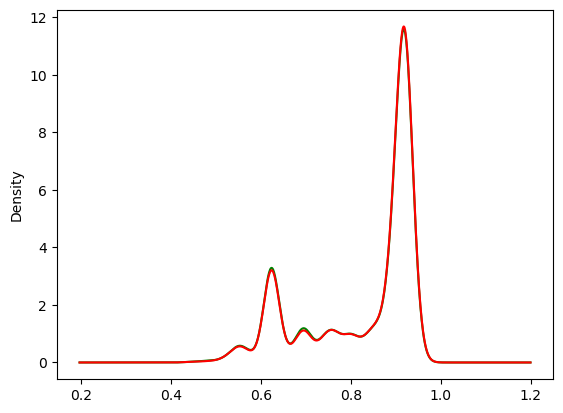

In [22]:


df['city_development_index'].plot.density(color='green')
new_df['city_development_index'].plot.density(color='red')

In [32]:
temp = pd.concat([
    # percentage of observations per category , original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category , cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
    
] , axis=1)
temp.columns=['Org','CCA']
temp

,Org,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [34]:
temp = pd.concat([
    # percentage of observations per category , original data
    df['education_level'].value_counts() / len(df),

    # percentage of observations per category , cca data
    new_df['education_level'].value_counts() / len(new_df)
    
] , axis=1)
temp.columns=['Org','CCA']
temp

,Org,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
